<a href="https://colab.research.google.com/github/Enzo1193/S-S/blob/main/09_05_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prompt 1:
Generate a Python script to simulate a signal composed of harmonics (10 Hz, 30 Hz, and 50 Hz) and noise. The signal should be sampled at 1000 Hz for 1 second. Additionally, add Gaussian noise with a specified power. Make sure to include parameters for the signal's duration, sample rate, and noise power.

Prompt 2:
Create a dictionary to store the harmonic frequencies and their corresponding amplitudes. Also, calculate the theoretical power for each harmonic based on its amplitude.

Prompt 3:
Set up a loop to simulate multiple signals (100 in this case). For each simulation, generate noise and add harmonics to it. Use the scipy.signal.welch() method to calculate the Power Spectral Density (PSD) of the signal.

Prompt 4:
Store the PSD peaks for each harmonic frequency and for the total signal. Use these peaks to analyze the signal's behavior.

Prompt 5:
Create a 2x2 grid of subplots to visualize the analysis of the PSD for each harmonic (10 Hz, 30 Hz, 50 Hz). In each subplot, include the histogram of PSD peaks, Kernel Density Estimation (KDE) of the peaks, and a Gaussian fit for comparison.

Prompt 6:
For each harmonic, calculate and print the mean, variance, and standard deviation of the PSD peaks. Perform the Kolmogorov-Smirnov test to check if the distribution of PSD peaks is compatible with a Gaussian distribution.

Prompt 7:
Generate a similar analysis for the total signal, which consists of the sum of the 10 Hz, 30 Hz, and 50 Hz harmonics, plus noise. Plot the histogram, KDE, and Gaussian fit for the total signal's PSD peaks in the last subplot.

Prompt 8:
Print the results for the total signal, including the mean, variance, and standard deviation of the PSD peaks, and perform the Kolmogorov-Smirnov test to check for Gaussian compatibility.


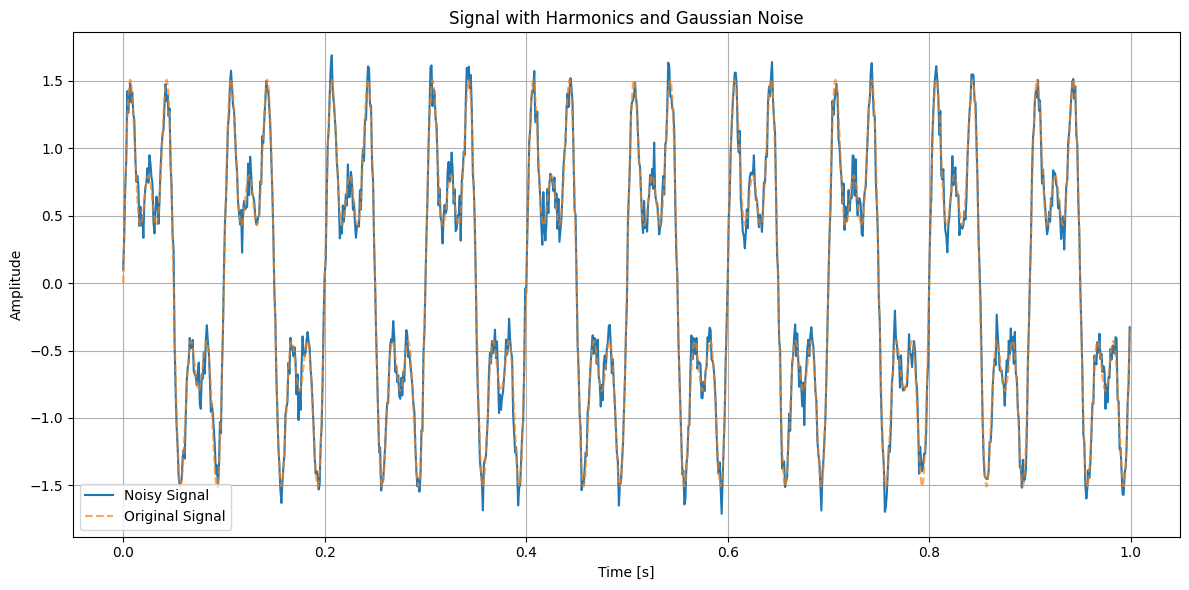

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
duration = 1.0              # in seconds
sample_rate = 1000          # in Hz
noise_power = 0.01          # variance of Gaussian noise

# Time vector
t = np.arange(0, duration, 1/sample_rate)

# Harmonic components
freqs = [10, 30, 50]        # in Hz
amplitudes = [1.0, 0.7, 0.5]  # relative amplitudes of the harmonics
signal = sum(a * np.sin(2 * np.pi * f * t) for a, f in zip(amplitudes, freqs))

# Add Gaussian noise
noise = np.random.normal(0, np.sqrt(noise_power), size=t.shape)
noisy_signal = signal + noise

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.plot(t, signal, label='Original Signal', linestyle='--', alpha=0.7)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Signal with Harmonics and Gaussian Noise')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Harmonic Powers (W):
10 Hz: 0.5000 W
30 Hz: 0.2450 W
50 Hz: 0.1250 W


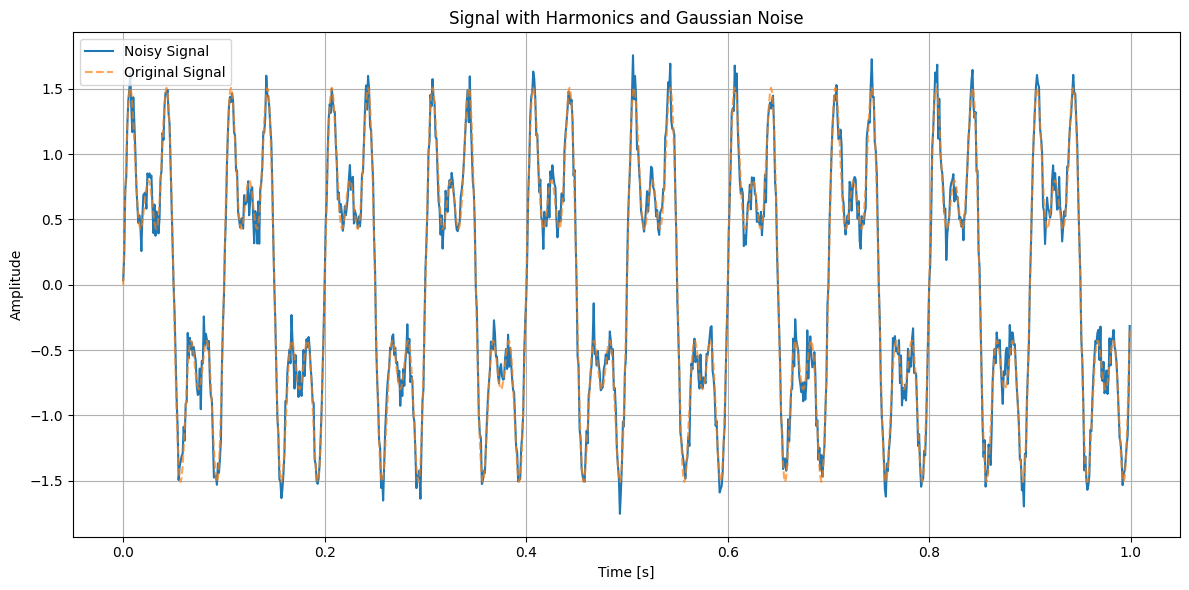

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
duration = 1.0               # in seconds
sample_rate = 1000           # in Hz
noise_power = 0.01           # variance of Gaussian noise

# Time vector
t = np.arange(0, duration, 1/sample_rate)

# Define harmonics in a dictionary: {frequency: amplitude}
harmonics = {
    10: 1.0,
    30: 0.7,
    50: 0.5
}

# Calculate theoretical power for each harmonic (P = A^2 / 2 for sine wave)
harmonic_powers = {f: (a**2) / 2 for f, a in harmonics.items()}

# Generate signal
signal = sum(a * np.sin(2 * np.pi * f * t) for f, a in harmonics.items())

# Add Gaussian noise
noise = np.random.normal(0, np.sqrt(noise_power), size=t.shape)
noisy_signal = signal + noise

# Print harmonic powers
print("Harmonic Powers (W):")
for freq, power in harmonic_powers.items():
    print(f"{freq} Hz: {power:.4f} W")

# Plot the signals
plt.figure(figsize=(12, 6))
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.plot(t, signal, label='Original Signal', linestyle='--', alpha=0.7)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Signal with Harmonics and Gaussian Noise')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Harmonic Theoretical Powers (W):
10 Hz: 0.5000 W
30 Hz: 0.2450 W
50 Hz: 0.1250 W


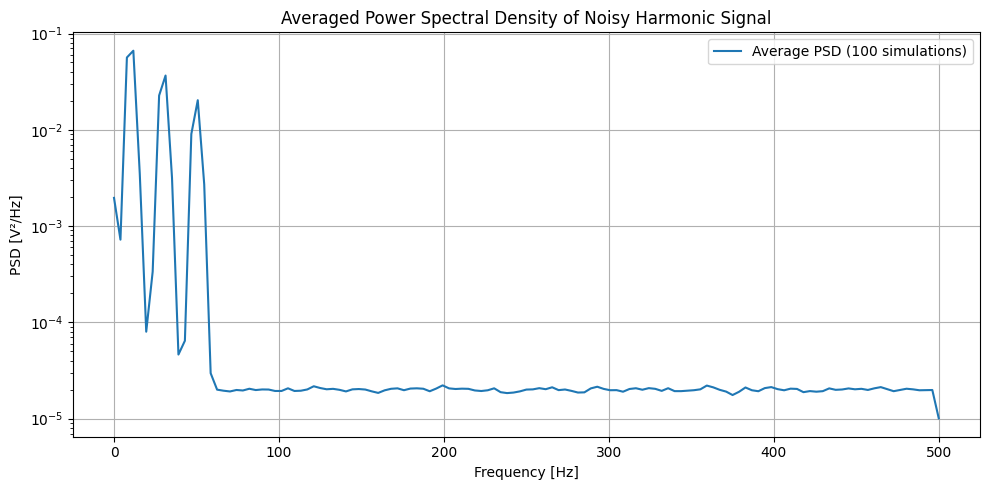

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Parameters
duration = 1.0               # in seconds
sample_rate = 1000           # in Hz
noise_power = 0.01           # variance of Gaussian noise
n_simulations = 100          # number of signal realizations

# Time vector
t = np.arange(0, duration, 1/sample_rate)

# Define harmonics: {frequency: amplitude}
harmonics = {
    10: 1.0,
    30: 0.7,
    50: 0.5
}

# Theoretical power of each harmonic (A^2 / 2)
harmonic_powers = {f: (a**2) / 2 for f, a in harmonics.items()}
print("Harmonic Theoretical Powers (W):")
for freq, power in harmonic_powers.items():
    print(f"{freq} Hz: {power:.4f} W")

# Frequency vector for Welch PSD
f_vals, _ = welch(np.zeros_like(t), fs=sample_rate)

# Initialize array to hold PSD estimates
psd_accum = np.zeros_like(f_vals)

# Loop to generate multiple realizations
for i in range(n_simulations):
    # Generate clean signal
    signal = sum(a * np.sin(2 * np.pi * f * t) for f, a in harmonics.items())

    # Add Gaussian noise
    noise = np.random.normal(0, np.sqrt(noise_power), size=t.shape)
    noisy_signal = signal + noise

    # Compute PSD using Welch's method
    f, psd = welch(noisy_signal, fs=sample_rate, nperseg=256)
    psd_accum += psd

# Average the PSD over all simulations
psd_avg = psd_accum / n_simulations

# Plot the averaged PSD
plt.figure(figsize=(10, 5))
plt.semilogy(f, psd_avg, label='Average PSD (100 simulations)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V²/Hz]')
plt.title('Averaged Power Spectral Density of Noisy Harmonic Signal')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Theoretical Harmonic Powers (W):
10 Hz: 0.5000 W
30 Hz: 0.2450 W
50 Hz: 0.1250 W

Averaged PSD Peaks and Total Power (over simulations):
10 Hz: Mean PSD = 0.066349, Std = 0.000660
30 Hz: Mean PSD = 0.036620, Std = 0.000539
50 Hz: Mean PSD = 0.020208, Std = 0.000395

Total Signal Power: Mean = 0.879321, Std = 0.007067


<ipython-input-13-509ed9f10071>:54: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  power_estimate = np.trapz(psd, f)


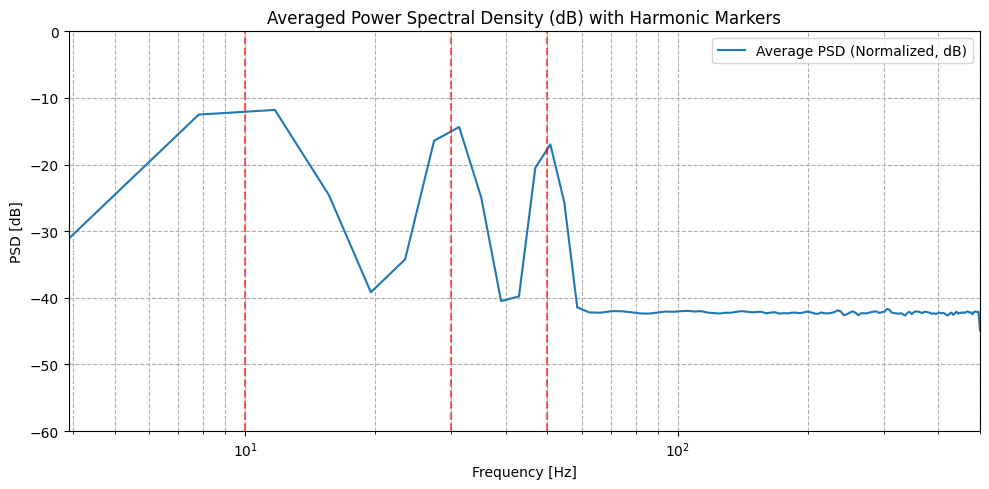

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Parameters
duration = 1.0               # in seconds
sample_rate = 1000           # in Hz
noise_power = 0.01           # variance of Gaussian noise
n_simulations = 100          # number of signal realizations

# Time vector
t = np.arange(0, duration, 1/sample_rate)

# Define harmonics: {frequency: amplitude}
harmonics = {
    10: 1.0,
    30: 0.7,
    50: 0.5
}

# Theoretical power of each harmonic (A^2 / 2)
harmonic_powers = {f: (a**2) / 2 for f, a in harmonics.items()}
print("Theoretical Harmonic Powers (W):")
for freq, power in harmonic_powers.items():
    print(f"{freq} Hz: {power:.4f} W")

# Compute reference frequency vector
f, _ = welch(np.zeros_like(t), fs=sample_rate, nperseg=256)

# Preallocate arrays to store peak PSD values
harmonic_peaks = {freq: [] for freq in harmonics}
total_psd_power = []

# Identify indices in f closest to each harmonic frequency
harmonic_indices = {freq: np.argmin(np.abs(f - freq)) for freq in harmonics}

# Simulation loop
for i in range(n_simulations):
    # Generate signal
    signal = sum(a * np.sin(2 * np.pi * f0 * t) for f0, a in harmonics.items())

    # Add Gaussian noise
    noise = np.random.normal(0, np.sqrt(noise_power), size=t.shape)
    noisy_signal = signal + noise

    # Compute PSD using Welch
    f, psd = welch(noisy_signal, fs=sample_rate, nperseg=256)

    # Store PSD peaks at harmonic frequencies
    for freq, idx in harmonic_indices.items():
        harmonic_peaks[freq].append(psd[idx])

    # Total signal power (numerical integral of PSD)
    power_estimate = np.trapz(psd, f)
    total_psd_power.append(power_estimate)

# --- Analysis ---

# Compute mean and std dev for each harmonic PSD peak
print("\nAveraged PSD Peaks and Total Power (over simulations):")
for freq in harmonics:
    mean_peak = np.mean(harmonic_peaks[freq])
    std_peak = np.std(harmonic_peaks[freq])
    print(f"{freq} Hz: Mean PSD = {mean_peak:.6f}, Std = {std_peak:.6f}")

# Total power stats
mean_total_power = np.mean(total_psd_power)
std_total_power = np.std(total_psd_power)
print(f"\nTotal Signal Power: Mean = {mean_total_power:.6f}, Std = {std_total_power:.6f}")

# Plot average PSD
avg_psd = np.mean([welch(
    sum(a * np.sin(2 * np.pi * f0 * t) + np.random.normal(0, np.sqrt(noise_power), t.shape)
        for f0, a in harmonics.items()
    ), fs=sample_rate, nperseg=256)[1] for _ in range(n_simulations)], axis=0)

# Convert PSD to dB (10 * log10(PSD))
avg_psd_dB = 10 * np.log10(avg_psd)
avg_psd_dB = np.clip(avg_psd_dB, -60, 0)  # Limit dB range from -60 to 0

# Plotting
plt.figure(figsize=(10, 5))

# Plot the normalized PSD in dB
plt.semilogx(f, avg_psd_dB, label='Average PSD (Normalized, dB)')

# Add vertical lines for harmonics
for freq in harmonics:
    plt.axvline(x=freq, color='r', linestyle='--', alpha=0.6)

# Customize axes and labels
plt.title('Averaged Power Spectral Density (dB) with Harmonic Markers')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [dB]')
plt.xlim([f[1], f[-1]])  # Ensure the X-axis spans a suitable range

# Adjust Y-axis for log scale with negative values
plt.ylim(-60, 0)  # Set Y-axis limits from -60 to 0 dB
plt.grid(True, which="both", ls="--")
plt.legend()
plt.tight_layout()
plt.show()



<ipython-input-6-3187df60187c>:50: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_psd_power.append(np.trapz(psd, f))


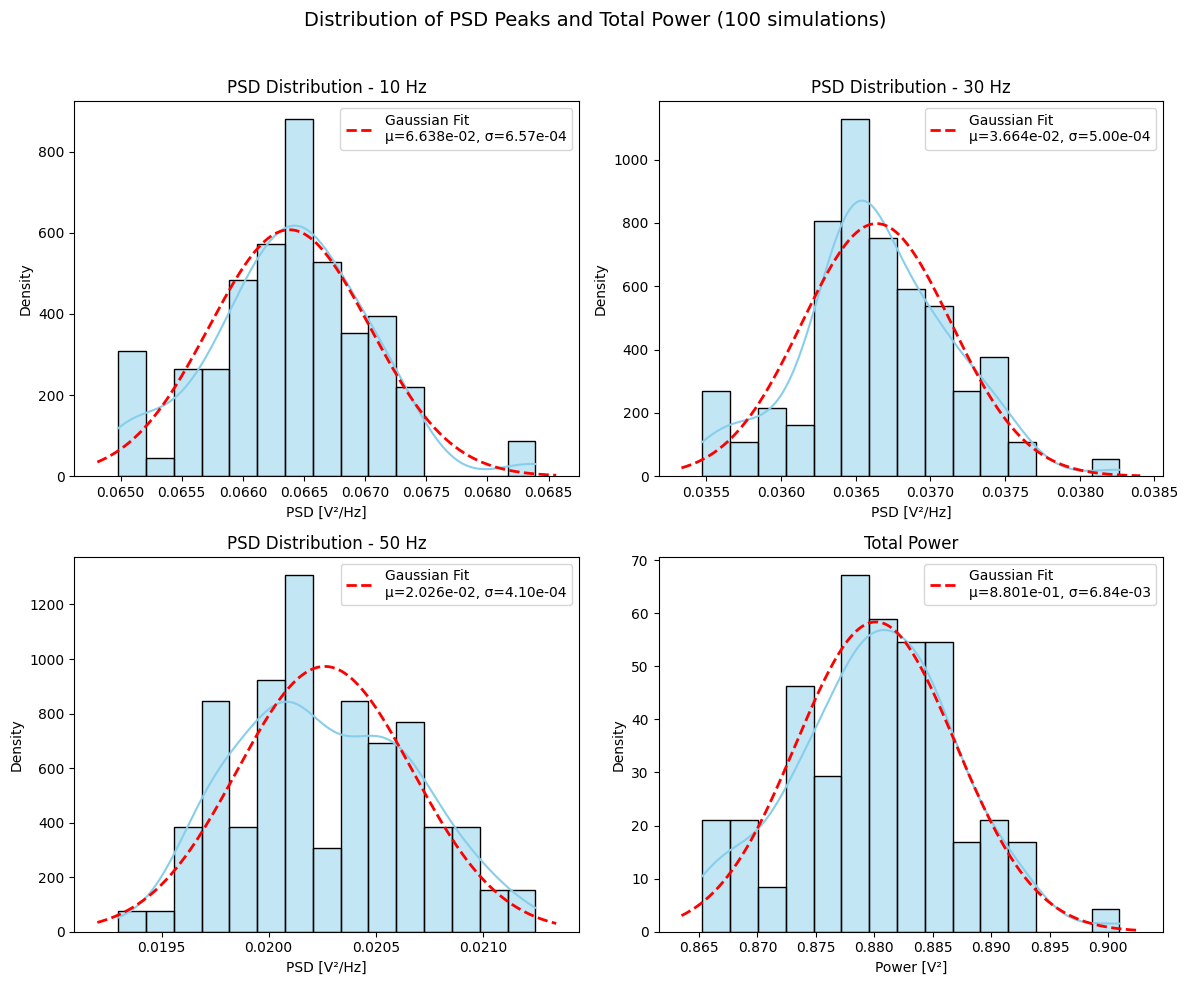

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from scipy.stats import norm
import seaborn as sns

# Parameters
duration = 1.0               # in seconds
sample_rate = 1000           # in Hz
noise_power = 0.01           # variance of Gaussian noise
n_simulations = 100          # number of signal realizations

# Time vector
t = np.arange(0, duration, 1/sample_rate)

# Define harmonics: {frequency: amplitude}
harmonics = {
    10: 1.0,
    30: 0.7,
    50: 0.5
}

# Compute reference frequency vector
f, _ = welch(np.zeros_like(t), fs=sample_rate, nperseg=256)

# Preallocate arrays to store peak PSD values
harmonic_peaks = {freq: [] for freq in harmonics}
total_psd_power = []

# Identify indices in f closest to each harmonic frequency
harmonic_indices = {freq: np.argmin(np.abs(f - freq)) for freq in harmonics}

# Simulation loop
for _ in range(n_simulations):
    # Generate signal
    signal = sum(a * np.sin(2 * np.pi * f0 * t) for f0, a in harmonics.items())

    # Add Gaussian noise
    noise = np.random.normal(0, np.sqrt(noise_power), size=t.shape)
    noisy_signal = signal + noise

    # Compute PSD using Welch
    f, psd = welch(noisy_signal, fs=sample_rate, nperseg=256)

    # Store PSD peaks at harmonic frequencies
    for freq, idx in harmonic_indices.items():
        harmonic_peaks[freq].append(psd[idx])

    # Total power via integration
    total_psd_power.append(np.trapz(psd, f))

# ---- Plotting: 2x2 Grid of Distributions ----
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()

# Define plot targets: 3 harmonics + total power
targets = list(harmonic_peaks.items()) + [("Total", total_psd_power)]

for i, (label, data) in enumerate(targets):
    ax = axs[i]
    data = np.array(data)

    # Histogram + KDE
    sns.histplot(data, bins=15, stat='density', kde=True, ax=ax, color='skyblue', edgecolor='k')

    # Fit and plot Gaussian
    mu, std = norm.fit(data)
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 200)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, 'r--', linewidth=2, label=f'Gaussian Fit\nμ={mu:.3e}, σ={std:.2e}')

    ax.set_title(f'PSD Distribution - {label} Hz' if label != "Total" else "Total Power")
    ax.set_xlabel('PSD [V²/Hz]' if label != "Total" else 'Power [V²]')
    ax.set_ylabel('Density')
    ax.legend()

plt.suptitle('Distribution of PSD Peaks and Total Power (100 simulations)', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


--- Results for harmonic at 10 Hz ---
Harmonic amplitude: 1.0
Theoretical power of harmonic: 0.5000 W/Hz
Mean of PSD peaks: 0.0700 W/Hz
Variance of PSD peaks: 0.0001 W^2/Hz
Standard deviation of PSD peaks: 0.0072 W/Hz
Kolmogorov-Smirnov test: D=0.0479, p-value=0.9672
✅ Distribution is compatible with Gaussian.

--- Results for harmonic at 30 Hz ---
Harmonic amplitude: 0.3
Theoretical power of harmonic: 0.0450 W/Hz
Mean of PSD peaks: 0.0085 W/Hz
Variance of PSD peaks: 0.0000 W^2/Hz
Standard deviation of PSD peaks: 0.0020 W/Hz
Kolmogorov-Smirnov test: D=0.0730, p-value=0.6337
✅ Distribution is compatible with Gaussian.

--- Results for harmonic at 50 Hz ---
Harmonic amplitude: 0.5
Theoretical power of harmonic: 0.1250 W/Hz
Mean of PSD peaks: 0.0224 W/Hz
Variance of PSD peaks: 0.0000 W^2/Hz
Standard deviation of PSD peaks: 0.0039 W/Hz
Kolmogorov-Smirnov test: D=0.0490, p-value=0.9607
✅ Distribution is compatible with Gaussian.

--- Results for total signal (10, 30, 50 Hz + Noise) ---
Mean

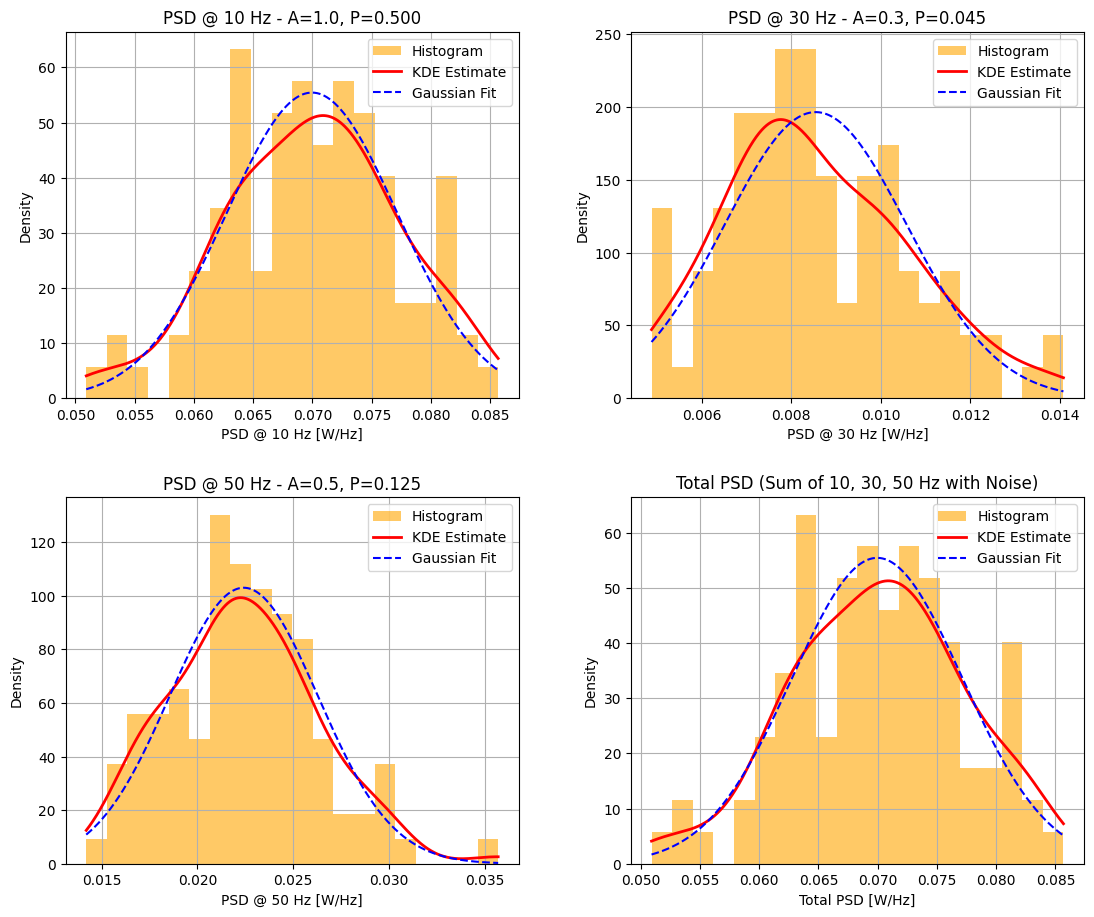

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from scipy.stats import gaussian_kde, kstest, norm

# General parameters
fs = 1000
duration = 1.0
t = np.arange(0, duration, 1/fs)
n_signals = 100
noise_power = 1

# Harmonics: frequency : amplitude
harmonics = {
    10: 1.0,
    30: 0.3,
    50: 0.5
}

# Pre-calculate theoretical powers of harmonics
harmonic_powers = {f: (A**2) / 2 for f, A in harmonics.items()}

# Dictionary to store PSD peaks per frequency
harmonic_peaks = {f: [] for f in harmonics}
total_peaks = []  # Store peaks of the total signal

# Simulation
for _ in range(n_signals):
    noise = np.random.normal(0, np.sqrt(noise_power), len(t))
    signal = noise.copy()

    # Add harmonics
    for freq, amp in harmonics.items():
        signal += amp * np.sin(2 * np.pi * freq * t)

    # Calculate PSD
    freqs, psd = welch(signal, fs=fs, nperseg=256)

    # Store PSD peak for each harmonic frequency
    for freq in harmonics:
        idx = np.argmin(np.abs(freqs - freq))
        harmonic_peaks[freq].append(psd[idx])

    # Store the peak of the total PSD
    total_peaks.append(np.max(psd))

# Create a 2x2 figure for the plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout(pad=5.0)

# Analysis per frequency for the harmonics and total signal
for idx, freq in enumerate(sorted(harmonics)):
    peaks = np.array(harmonic_peaks[freq])
    mean_val = np.mean(peaks)
    var_val = np.var(peaks)
    std_val = np.std(peaks)
    amp_val = harmonics[freq]
    power_theoretical = harmonic_powers[freq]

    # Kolmogorov-Smirnov test for normality
    D, p = kstest(peaks, 'norm', args=(mean_val, std_val))

    # KDE and Gaussian fit
    kde = gaussian_kde(peaks)
    x_grid = np.linspace(min(peaks), max(peaks), 1000)
    pdf_estimate = kde(x_grid)

    # Plot
    ax = axes[idx // 2, idx % 2]
    ax.hist(peaks, bins=20, density=True, alpha=0.6, color='orange', label='Histogram')
    ax.plot(x_grid, pdf_estimate, 'r-', linewidth=2, label='KDE Estimate')
    ax.plot(x_grid, norm.pdf(x_grid, mean_val, std_val), 'b--', label='Gaussian Fit')
    ax.set_title(f'PSD @ {freq} Hz - A={amp_val}, P={power_theoretical:.3f}')
    ax.set_xlabel(f'PSD @ {freq} Hz [W/Hz]')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True)

    # Print results
    print(f"--- Results for harmonic at {freq} Hz ---")
    print(f"Harmonic amplitude: {amp_val}")
    print(f"Theoretical power of harmonic: {power_theoretical:.4f} W/Hz")
    print(f"Mean of PSD peaks: {mean_val:.4f} W/Hz")
    print(f"Variance of PSD peaks: {var_val:.4f} W^2/Hz")
    print(f"Standard deviation of PSD peaks: {std_val:.4f} W/Hz")
    print(f"Kolmogorov-Smirnov test: D={D:.4f}, p-value={p:.4f}")
    if p > 0.05:
        print("✅ Distribution is compatible with Gaussian.")
    else:
        print("❌ Distribution is NOT compatible with Gaussian.")
    print()

# Analysis of the total signal (sum of 10, 30, 50 Hz harmonics + noise)
total_peaks = np.array(total_peaks)
mean_total = np.mean(total_peaks)
var_total = np.var(total_peaks)
std_total = np.std(total_peaks)

# Kolmogorov-Smirnov test for total signal
D_total, p_total = kstest(total_peaks, 'norm', args=(mean_total, std_total))

# KDE and Gaussian fit for total signal
kde_total = gaussian_kde(total_peaks)
x_grid_total = np.linspace(min(total_peaks), max(total_peaks), 1000)
pdf_estimate_total = kde_total(x_grid_total)

# Plot the total signal in the last position (second row, second column)
ax = axes[1, 1]
ax.hist(total_peaks, bins=20, density=True, alpha=0.6, color='orange', label='Histogram')
ax.plot(x_grid_total, pdf_estimate_total, 'r-', linewidth=2, label='KDE Estimate')
ax.plot(x_grid_total, norm.pdf(x_grid_total, mean_total, std_total), 'b--', label='Gaussian Fit')
ax.set_title('Total PSD (Sum of 10, 30, 50 Hz with Noise)')
ax.set_xlabel('Total PSD [W/Hz]')
ax.set_ylabel('Density')
ax.legend()
ax.grid(True)

# Print results for total signal
print("--- Results for total signal (10, 30, 50 Hz + Noise) ---")
print(f"Mean of total PSD peaks: {mean_total:.4f} W/Hz")
print(f"Variance of total PSD peaks: {var_total:.4f} W^2/Hz")
print(f"Standard deviation of total PSD peaks: {std_total:.4f} W/Hz")
print(f"Kolmogorov-Smirnov test for total signal: D={D_total:.4f}, p-value={p_total:.4f}")
if p_total > 0.05:
    print("✅ Distribution is compatible with Gaussian.")
else:
    print("❌ Distribution is NOT compatible with Gaussian.")


Generate a Python script that creates a signal composed of multiple sinusoidal components (10 Hz, 30 Hz, and 50 Hz) with different amplitudes, adds Gaussian white noise to it, and then applies a high-pass filter in the frequency domain. The filter should be modeled as an RL circuit with a cutoff frequency of 50 Hz. The script should plot the transfer function magnitude of the filter, compare the noisy, original, and filtered signals in the time domain, and display the frequency spectrum of the filtered signal.

<ipython-input-23-477c148a732f>:34: RuntimeWarning: divide by zero encountered in log10
  magnitude_H = 20 * np.log10(np.abs(H))
<ipython-input-23-477c148a732f>:40: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([frequencies[1], frequencies[len(frequencies)//2]])  # Focus on positive frequencies


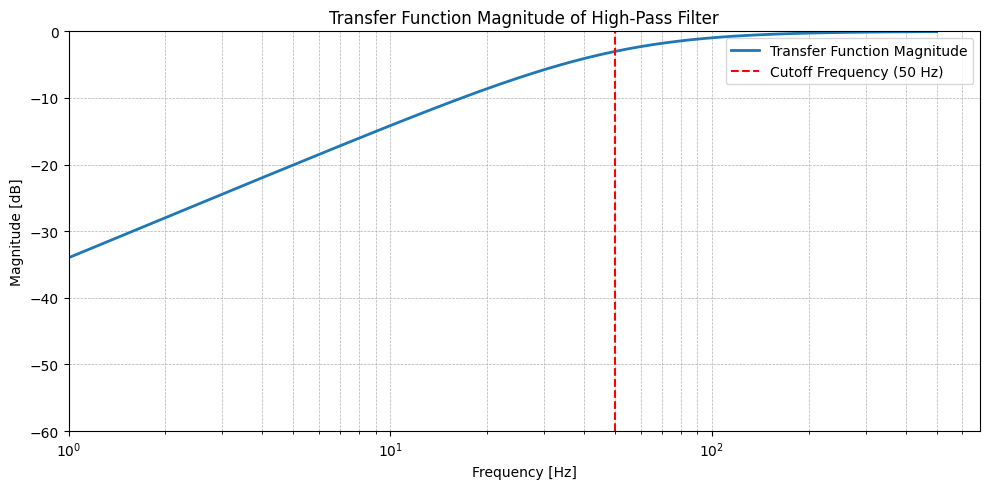

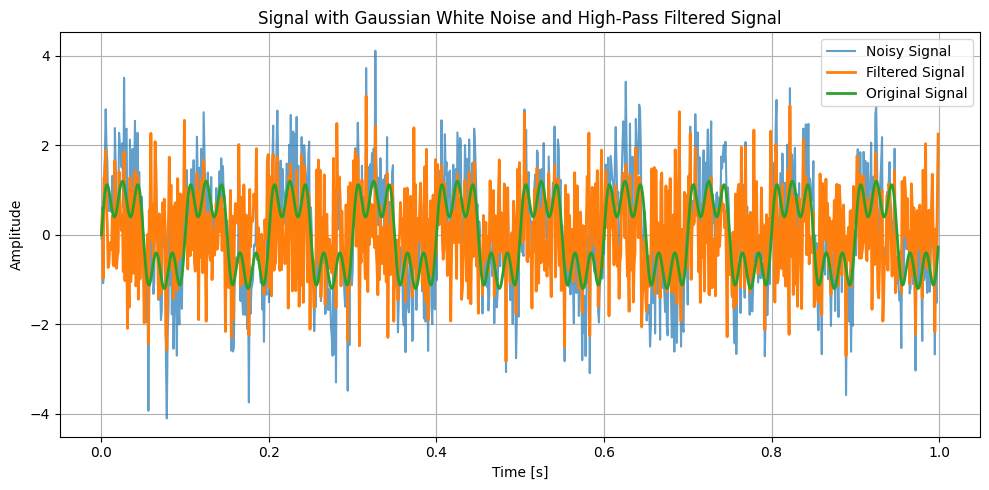

<ipython-input-23-477c148a732f>:83: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([positive_frequencies[0], positive_frequencies[-1]])  # Limit x-axis to positive frequencies


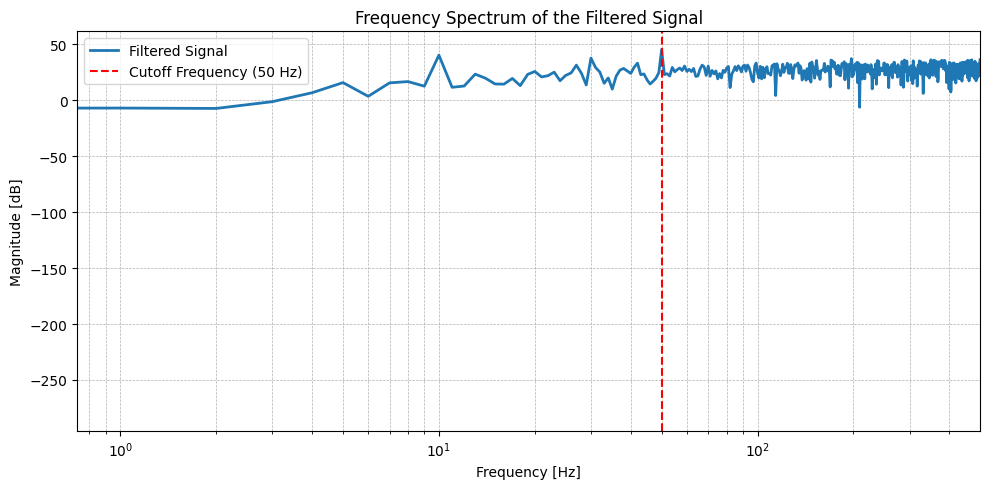

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sampling parameters
fs = 1000  # Sampling frequency in Hz
duration = 1.0  # Duration in seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Signal components
frequencies = [10, 30, 50]
amplitudes = [1.0, 0.3, 0.5]

# Generate clean signal
signal = sum(A * np.sin(2 * np.pi * f * t) for A, f in zip(amplitudes, frequencies))

# Generate Gaussian white noise
noise = np.random.normal(loc=0.0, scale=1.0, size=signal.shape)

# Combine signal and noise
noisy_signal = signal + noise

# High-pass filter parameters
cutoff_freq = 50  # Cutoff frequency in Hz
R = 1000  # Resistance in Ohms (example value)
L = R / (2 * np.pi * cutoff_freq)  # Inductance in Henrys

# Frequency domain filter
frequencies = np.fft.fftfreq(len(t), 1/fs)
omega = 2 * np.pi * frequencies
H = 1j * omega * L / (R + 1j * omega * L)  # Transfer function for RL high-pass filter

# Plot the transfer function magnitude to check attenuation behavior
plt.figure(figsize=(10, 5))
magnitude_H = 20 * np.log10(np.abs(H))
plt.semilogx(frequencies[:len(frequencies)//2], magnitude_H[:len(frequencies)//2], label='Transfer Function Magnitude', linewidth=2)
plt.axvline(x=cutoff_freq, color='r', linestyle='--', label=f'Cutoff Frequency ({cutoff_freq} Hz)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.title('Transfer Function Magnitude of High-Pass Filter')
plt.xlim([frequencies[1], frequencies[len(frequencies)//2]])  # Focus on positive frequencies
plt.ylim([-60, 0])  # Limit y-axis to -60 dB to 0 dB
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Apply the filter in the frequency domain
noisy_signal_fft = np.fft.fft(noisy_signal)
filtered_signal_fft = noisy_signal_fft * H  # Apply the transfer function

# Inverse FFT to get the filtered signal
filtered_signal = np.fft.ifft(filtered_signal_fft)

# Plotting the filtered signal in time domain
plt.figure(figsize=(10, 5))
plt.plot(t, noisy_signal, label='Noisy Signal', alpha=0.7)
plt.plot(t, np.real(filtered_signal), label='Filtered Signal', linewidth=2)
plt.plot(t, signal, label='Original Signal', linewidth=2)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Signal with Gaussian White Noise and High-Pass Filtered Signal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting the frequency spectrum of the filtered signal
filtered_signal_fft = np.fft.fft(filtered_signal)
positive_frequencies = frequencies[:len(frequencies)//2]
positive_filtered_signal_fft = filtered_signal_fft[:len(filtered_signal_fft)//2]

# Calculate the magnitude and convert to dB
magnitude = np.abs(positive_filtered_signal_fft)
magnitude_dB = 20 * np.log10(magnitude)

# Plotting the frequency spectrum in dB with logarithmic scale for x-axis
plt.figure(figsize=(10, 5))
plt.semilogx(positive_frequencies, magnitude_dB, label='Filtered Signal', linewidth=2)
plt.axvline(x=cutoff_freq, color='r', linestyle='--', label=f'Cutoff Frequency ({cutoff_freq} Hz)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.title('Frequency Spectrum of the Filtered Signal')
plt.xlim([positive_frequencies[0], positive_frequencies[-1]])  # Limit x-axis to positive frequencies
#plt.ylim([-60, 0])  # Limit y-axis to -60 dB to 0 dB
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


Generate a Python script that applies high pass filters with different cutoff frequencies (10 Hz, 30 Hz and 50 Hz) to the previously generated signal. The script should define a function to create the transfer function of the high pass filter based on the cutoff frequency and sampling frequency, and another function to calculate the impulse response of each filter using the inverse FFT. It should then plot the impulse responses for each filter, apply each filter to the noisy signal, and display the filtered signals for comparison in the time domain.

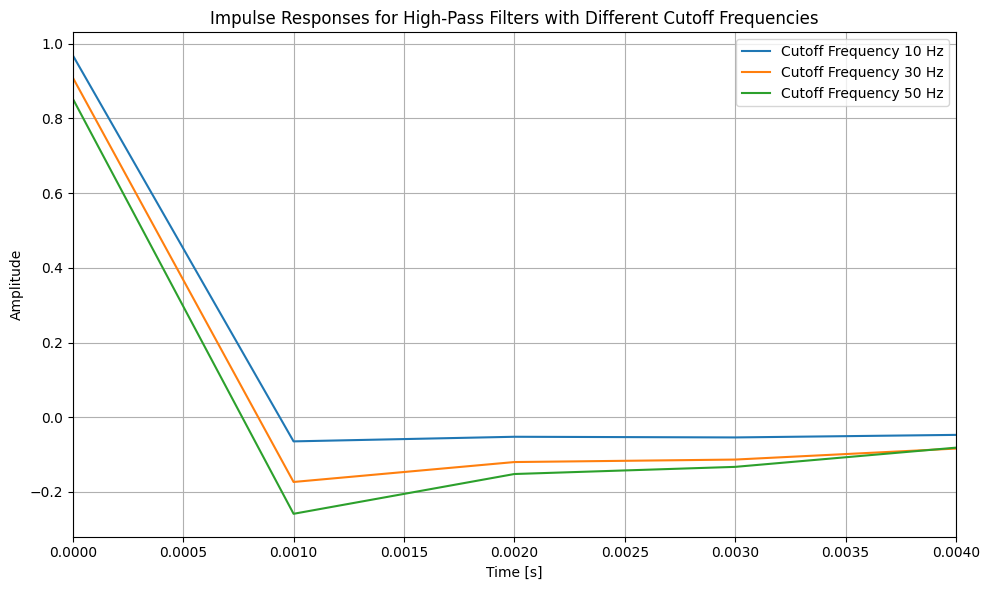

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sampling parameters
fs = 1000  # Sampling frequency in Hz
duration = 1.0  # Duration in seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Signal components
frequencies = [10, 30, 50]
amplitudes = [1.0, 0.3, 0.5]

# Generate clean signal
signal = sum(A * np.sin(2 * np.pi * f * t) for A, f in zip(amplitudes, frequencies))

# Generate Gaussian white noise
noise = np.random.normal(loc=0.0, scale=1.0, size=signal.shape)

# Combine signal and noise
noisy_signal = signal + noise

# Function to create the high-pass filter transfer function
def create_high_pass_filter(cutoff_freq, fs, R=1000):
    L = R / (2 * np.pi * cutoff_freq)  # Inductance in Henrys (based on cutoff frequency)
    frequencies = np.fft.fftfreq(len(t), 1/fs)
    omega = 2 * np.pi * frequencies
    H = 1j * omega * L / (R + 1j * omega * L)  # Transfer function for RL high-pass filter
    return frequencies, H

# Create high-pass filters with different cutoff frequencies
cutoff_freqs = [10, 30, 50]
filters = {}

for cutoff_freq in cutoff_freqs:
    freqs, H = create_high_pass_filter(cutoff_freq, fs)
    filters[cutoff_freq] = (freqs, H)

# Function to get the impulse response of the filter
def get_impulse_response(H, fs):
    # Take the inverse FFT of the transfer function to get the impulse response
    impulse_response = np.fft.ifft(H)
    return np.real(impulse_response)

# Get the impulse responses for the filters at 10 Hz, 30 Hz, and 50 Hz
impulse_responses = {}

for cutoff_freq, (freqs, H) in filters.items():
    impulse_responses[cutoff_freq] = get_impulse_response(H, fs)

# Plot the impulse responses for each filter
plt.figure(figsize=(10, 6))

for cutoff_freq, impulse_response in impulse_responses.items():
    plt.plot(t, impulse_response, label=f'Cutoff Frequency {cutoff_freq} Hz')

plt.xlabel('Time [s]')
plt.xlim(0,0.004)
plt.ylabel('Amplitude')
plt.title('Impulse Responses for High-Pass Filters with Different Cutoff Frequencies')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Apply each filter to the noisy signal and plot the results
filtered_signals = {}

for cutoff_freq, (freqs, H) in filters.items():
    noisy_signal_fft = np.fft.fft(noisy_signal)
    filtered_signal_fft = noisy_signal_fft * H  # Apply the filter
    filtered_signal = np.fft.ifft(filtered_signal_fft)
    filtered_signals[cutoff_freq] = np.real(filtered_signal)

# Plot the filtered signals for comparison
plt.figure(figsize=(10, 6))



Generate a Python script that creates a 2x2 grid of subplots to visualize the filtered signals with different cutoff frequencies (10 Hz, 30 Hz, and 50 Hz) and the original noisy signal. The script should plot the filtered signals in separate subplots for each cutoff frequency (using distinct colors for each), and in the last subplot, it should display the noisy signal with a different style for comparison. Each subplot should include labels for the x-axis and y-axis, a title, a legend, and gridlines for clarity.

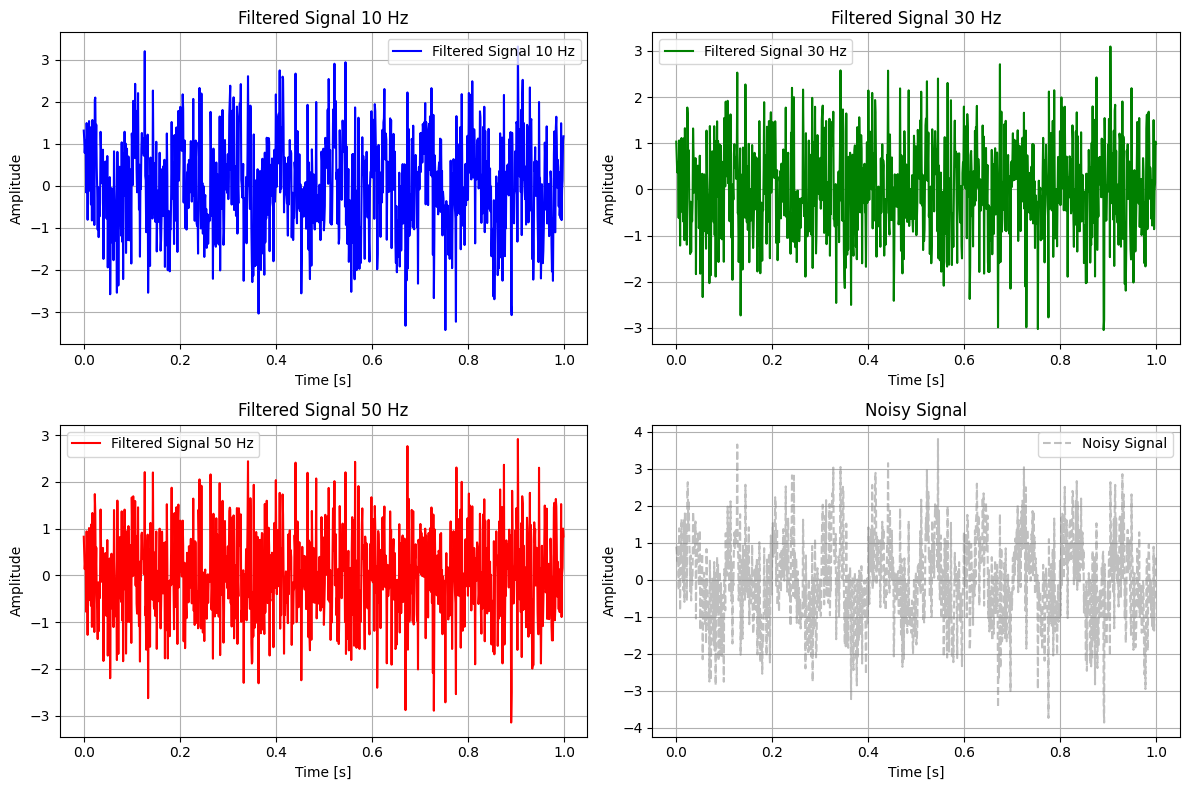

In [ ]:
# Create a 2x2 grid for the plots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot the filtered signals with different cutoff frequencies in separate subplots
axs[0, 0].plot(t, filtered_signals[10], label=f'Filtered Signal 10 Hz', color='blue')
axs[0, 0].set_title('Filtered Signal 10 Hz')
axs[0, 0].set_xlabel('Time [s]')
axs[0, 0].set_ylabel('Amplitude')
axs[0, 0].grid(True)
axs[0, 0].legend()

axs[0, 1].plot(t, filtered_signals[30], label=f'Filtered Signal 30 Hz', color='green')
axs[0, 1].set_title('Filtered Signal 30 Hz')
axs[0, 1].set_xlabel('Time [s]')
axs[0, 1].set_ylabel('Amplitude')
axs[0, 1].grid(True)
axs[0, 1].legend()

axs[1, 0].plot(t, filtered_signals[50], label=f'Filtered Signal 50 Hz', color='red')
axs[1, 0].set_title('Filtered Signal 50 Hz')
axs[1, 0].set_xlabel('Time [s]')
axs[1, 0].set_ylabel('Amplitude')
axs[1, 0].grid(True)
axs[1, 0].legend()

# Plot the noisy signal in the last subplot
axs[1, 1].plot(t, noisy_signal, label='Noisy Signal', color='gray', alpha=0.5, linestyle='--')
axs[1, 1].set_title('Noisy Signal')
axs[1, 1].set_xlabel('Time [s]')
axs[1, 1].set_ylabel('Amplitude')
axs[1, 1].grid(True)
axs[1, 1].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()
